In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
with open("allData.pkl","rb") as f:
    d=pickle.load(f)

In [3]:
production=d['Production']

In [4]:
production.shape

(140, 9)

In [5]:
production.dtypes

%time                         int64
ProdA                       float64
ProdB                       float64
avg_nr_harvested_trusses    float64
Truss development time      float64
Nr_fruits_ClassA            float64
Weight_fruits_ClassA        float64
Nr_fruits_ClassB              int64
Weight_fruits_ClassB          int64
dtype: object

In [6]:
production.nunique()

%time                        25
ProdA                        88
ProdB                        17
avg_nr_harvested_trusses     20
Truss development time       55
Nr_fruits_ClassA             99
Weight_fruits_ClassA        136
Nr_fruits_ClassB              9
Weight_fruits_ClassB          9
dtype: int64

In [7]:
#View the data
production.head()

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43880,0.037,0.0,0.1,50.0,NaN,128.0,0,0
1,43885,0.767,0.0,0.9,54.5,136.0,1271.0,0,0
2,43889,0.232,0.0,0.6,51.0,89.0,788.0,0,0
3,43894,0.778,0.0,1.5,55.1,226.0,2001.0,0,0
4,43899,0.248,0.0,0.9,53.6,133.0,1144.0,0,0


In [8]:
production.columns

Index(['%time', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB'],
      dtype='object')

In [9]:
#Basic information
production.info()
#Describe the data
production.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   %time                     140 non-null    int64  
 1   ProdA                     140 non-null    float64
 2   ProdB                     140 non-null    float64
 3   avg_nr_harvested_trusses  138 non-null    float64
 4   Truss development time    139 non-null    float64
 5   Nr_fruits_ClassA          134 non-null    float64
 6   Weight_fruits_ClassA      140 non-null    float64
 7   Nr_fruits_ClassB          140 non-null    int64  
 8   Weight_fruits_ClassB      140 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 10.0 KB


,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
count,140.000000,140.000000,140.000000,138.000000,139.000000,134.000000,140.000000,140.000000,140.000000
mean,43927.764286,0.593343,0.014044,0.942029,49.333094,132.798507,1261.910714,1.685714,17.807143
std,47.139104,0.240515,0.075209,0.387545,4.840445,54.861655,557.100878,8.216570,84.159740
min,43510.000000,0.010000,0.000000,0.100000,31.800000,0.000000,0.000000,0.000000,0.000000
25%,43903.000000,0.407500,0.000000,0.700000,46.800000,89.250000,829.500000,0.000000,0.000000
50%,43931.000000,0.611500,0.000000,0.950000,50.000000,133.500000,1279.500000,0.000000,0.000000
75%,43959.000000,0.745000,0.000000,1.200000,53.000000,167.750000,1613.250000,0.000000,0.000000
max,43980.000000,1.213000,0.600000,2.500000,60.000000,313.000000,2810.000000,74.000000,677.000000


In [10]:
#Find the duplicates
production.duplicated().sum()

0

In [11]:
#Find NaN values
production.isna().sum()

%time                       0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    2
Truss development time      1
Nr_fruits_ClassA            6
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

In [12]:
#Replacing Nan values with mean of their respective columns
imputer = SimpleImputer(strategy = "mean")
cn= production.columns
values =production.values
df = imputer.fit_transform(values)
production= pd.DataFrame(df, columns = cn)

In [13]:
production.head()

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43880.0,0.037,0.0,0.1,50.0,132.798507,128.0,0.0,0.0
1,43885.0,0.767,0.0,0.9,54.5,136.000000,1271.0,0.0,0.0
2,43889.0,0.232,0.0,0.6,51.0,89.000000,788.0,0.0,0.0
3,43894.0,0.778,0.0,1.5,55.1,226.000000,2001.0,0.0,0.0
4,43899.0,0.248,0.0,0.9,53.6,133.000000,1144.0,0.0,0.0


### We can see that the NaN values are replaced by the means of their respective columns

In [14]:
#renaming
production.rename(columns={"%time": "Time"}, inplace=True)

In [15]:
#changing time format
production['Time'] = pd.to_datetime(production['Time'], unit='D', origin='1899-12-30')

In [16]:
production.head()

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,2020-02-19,0.037,0.0,0.1,50.0,132.798507,128.0,0.0,0.0
1,2020-02-24,0.767,0.0,0.9,54.5,136.000000,1271.0,0.0,0.0
2,2020-02-28,0.232,0.0,0.6,51.0,89.000000,788.0,0.0,0.0
3,2020-03-04,0.778,0.0,1.5,55.1,226.000000,2001.0,0.0,0.0
4,2020-03-09,0.248,0.0,0.9,53.6,133.000000,1144.0,0.0,0.0


<ipython-input-17-3a83559e6fac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(production.corr(), annot=True)


<AxesSubplot:>

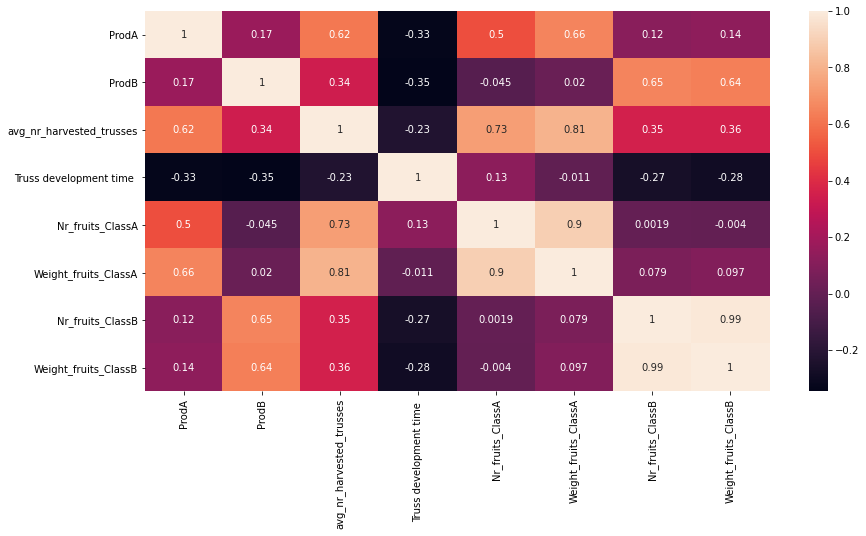

In [17]:
#correlation
plt.figure(figsize=(14,7))
sns.heatmap(production.corr(), annot=True)

In [18]:
correlations = production.corr()
cols = correlations
for i in cols:
    for j in cols:
         if i!=j and abs(correlations.loc[i, j])>= 0.6:
            print(f"{i} and {j} correlated with value {correlations.loc[i, j]}")

ProdA and avg_nr_harvested_trusses correlated with value 0.6212149410302908
ProdA and Weight_fruits_ClassA correlated with value 0.6574120907685685
ProdB and Nr_fruits_ClassB correlated with value 0.6541676703382423
ProdB and Weight_fruits_ClassB correlated with value 0.641112205361575
avg_nr_harvested_trusses and ProdA correlated with value 0.6212149410302908
avg_nr_harvested_trusses and Nr_fruits_ClassA correlated with value 0.7338365349779187
avg_nr_harvested_trusses and Weight_fruits_ClassA correlated with value 0.8051072598742645
Nr_fruits_ClassA and avg_nr_harvested_trusses correlated with value 0.7338365349779187
Nr_fruits_ClassA and Weight_fruits_ClassA correlated with value 0.8999678168901233
Weight_fruits_ClassA and ProdA correlated with value 0.6574120907685685
Weight_fruits_ClassA and avg_nr_harvested_trusses correlated with value 0.8051072598742645
Weight_fruits_ClassA and Nr_fruits_ClassA correlated with value 0.8999678168901233
Nr_fruits_ClassB and ProdB correlated with 

<ipython-input-18-51aaf4708e6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = production.corr()


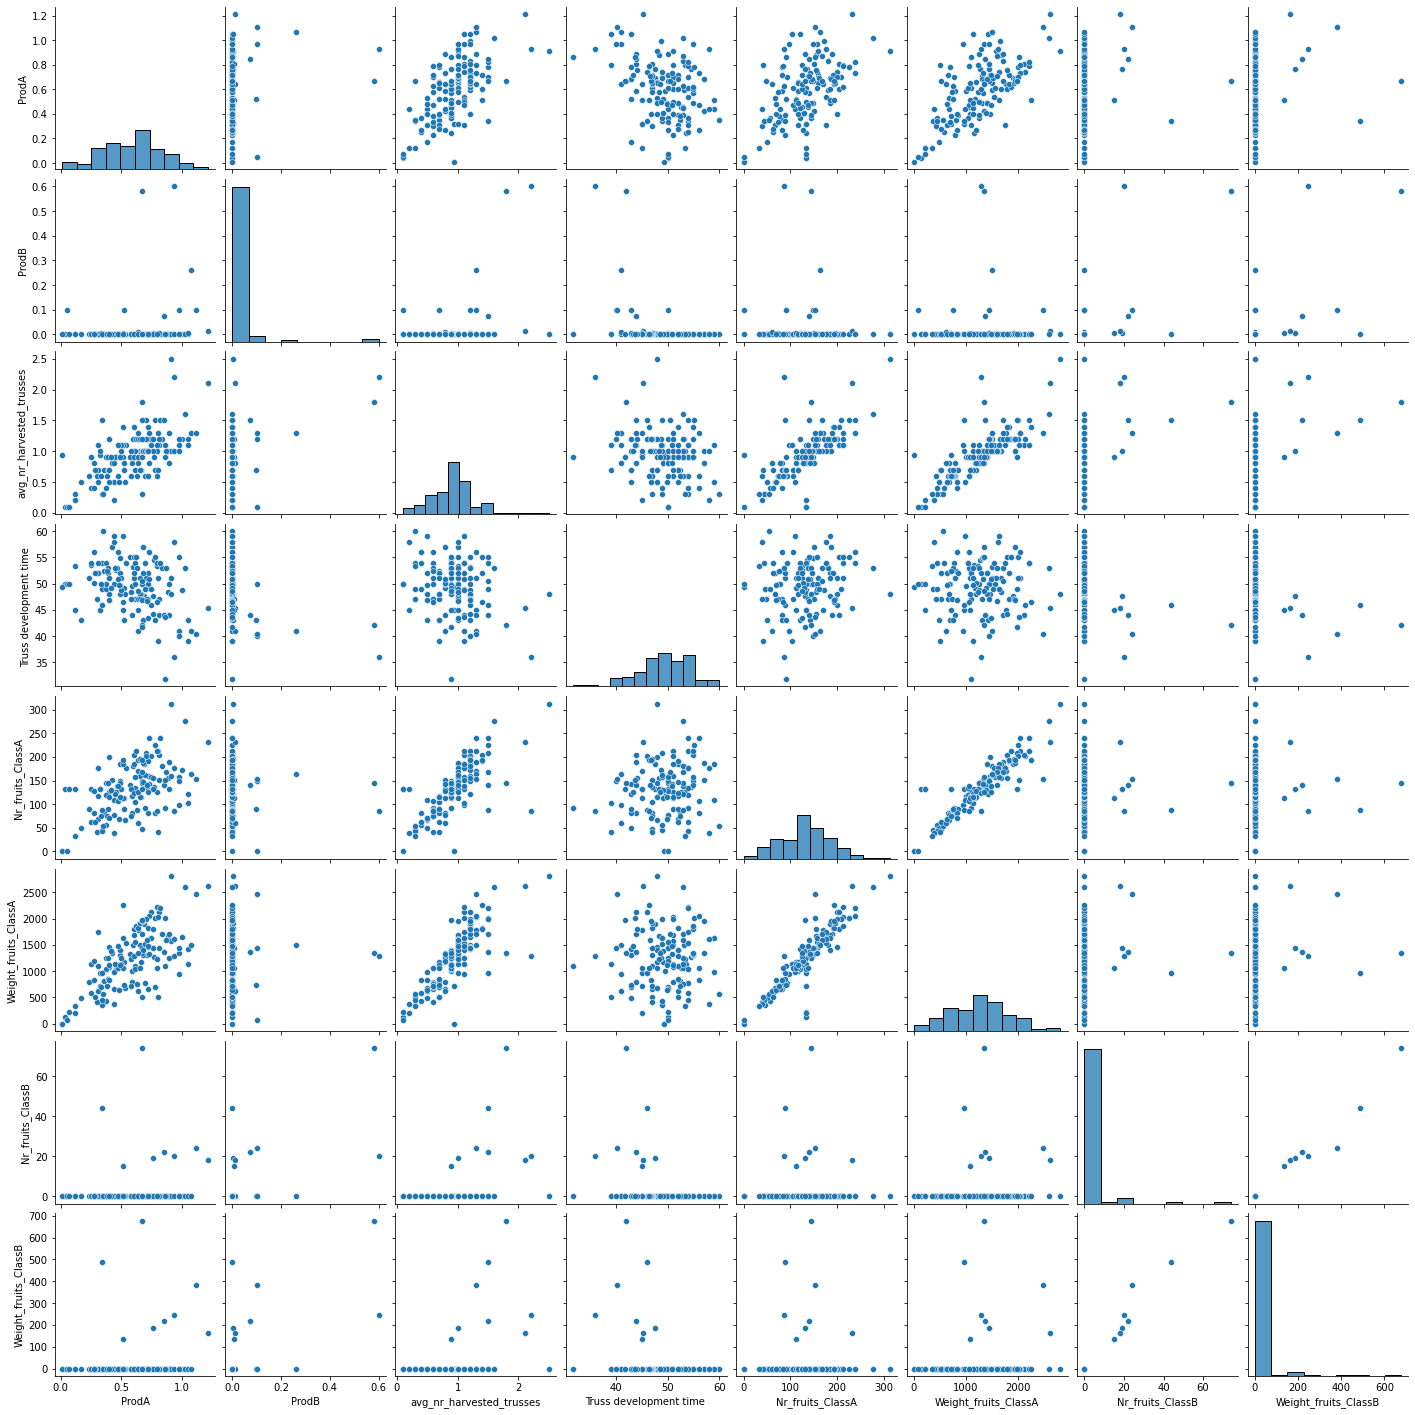

In [19]:
sns.pairplot(production)

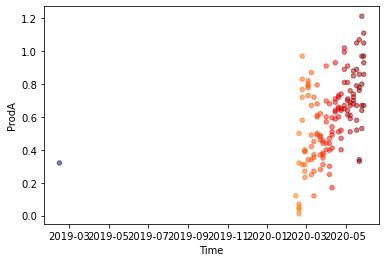

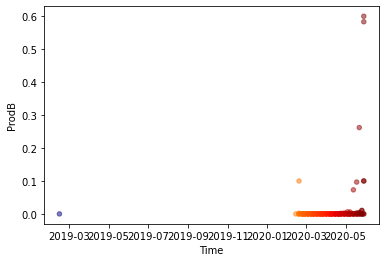

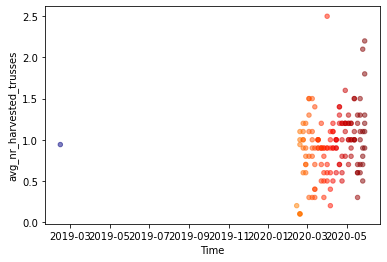

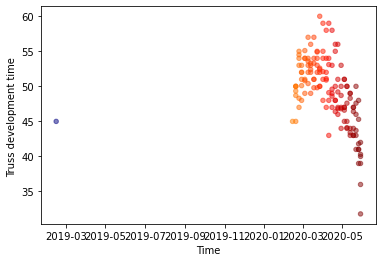

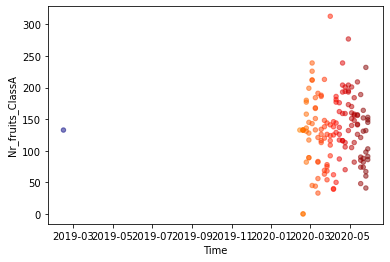

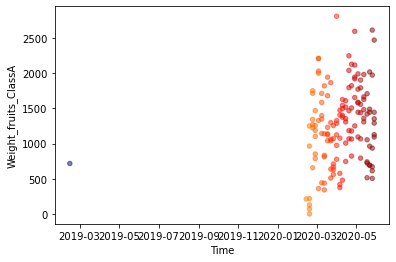

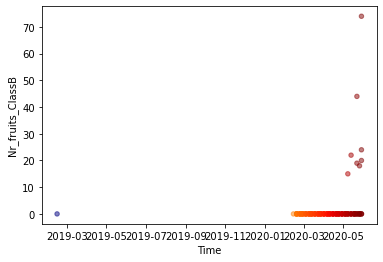

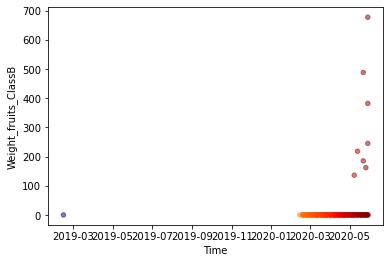

In [20]:
#scatter plot with respect to time 
columns=['ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB']
for i in columns:
    production.plot(kind='scatter',x='Time', y=i, alpha=0.5, c='Time',cmap=plt.get_cmap("jet"))